<a href="https://colab.research.google.com/github/NidhiSingh25901/MLAlgorithm/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
plt.style.use("seaborn-v0_8-darkgrid")

In [ ]:
#Step 1 - Generate Toy (Dummy)

x,y = make_blobs(n_samples=2000, n_features=2,cluster_std=3, centers=4,random_state=42)
n_features=2
print(x.shape, y.shape)

(2000, 2) (2000,)


In [ ]:
print(y)

[1 1 2 ... 2 2 1]


In [ ]:
#Visualize datsets
def visualize(x,y):
  plt.scatter(x[:,0],x[:,1],c=y, cmap="viridis")
  plt.show()

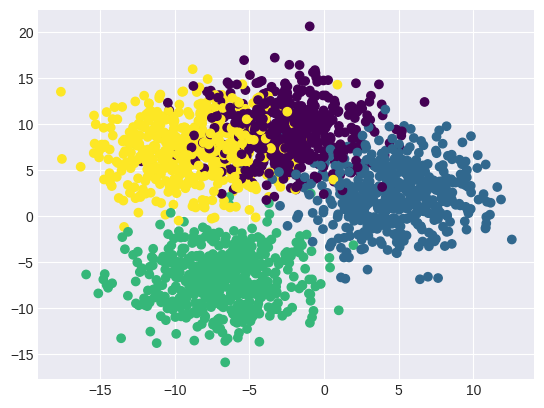

In [ ]:
visualize(x,y)

In [ ]:
#Step 3 - normalize
def normalize(x):
  u = x.mean(axis=0)
  std = x.std(axis=0)
  return (x-u)/std

In [ ]:
x = normalize(x)

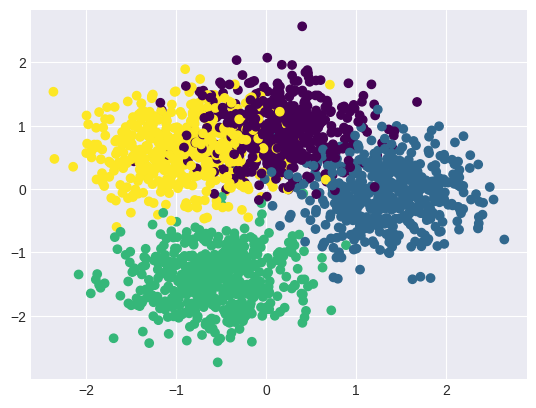

In [ ]:
visualize(x,y)

In [ ]:
#Step 4 - train test split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25,shuffle = False, random_state=0)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(1500, 2) (1500,)
(500, 2) (500,)


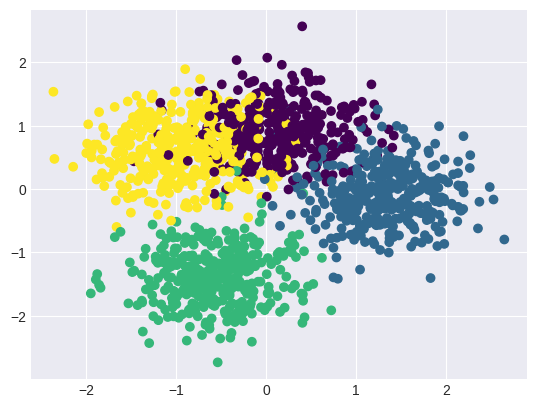

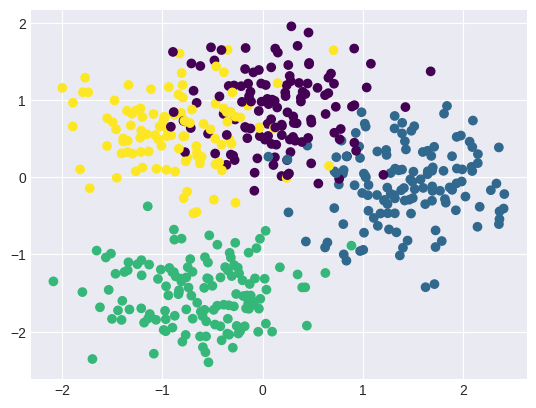

In [ ]:
visualize(xtrain,ytrain)
visualize(xtest, ytest)

In [ ]:
#Model

def sigmoid(z):
  return 1 / (1+np.exp(-z))

def hypothesis(x, theta):
  return sigmoid(np.dot(x,theta))

#Binary cross entropy

def error(y, yp):
  loss = -np.mean(y*np.log(yp)+(1-y)*np.log(1-yp))
  return loss

def gradient(x,y,yp):
  m = x.shape[0]
  grad=[-(1/m)*np.dot(x.T, (y-yp))]
  return grad[0]

def train(x,y, max_iter=100, learning_rate=0.1):
  theta = np.random.randn(n_features+1,1)

  error_list = []

  for i in range(max_iter):
    yp = hypothesis(x,theta)
    e = error(y,yp)
    error_list.append(e)
    grad = gradient(x,y,yp)
    theta = theta - learning_rate*grad

  plt.plot(error_list)
  plt.show()
  return theta

In [ ]:
#Trainig Loop
def addExtraColumn(x):
  if x.shape[1] == n_features:
    ones = np.ones((x.shape[0],1))
    x= np.hstack((ones,x))
  return x


In [ ]:
xtrain  = addExtraColumn(xtrain)
print(xtrain)

[[ 1.          1.26532724 -0.96189332]
 [ 1.          1.59899776  0.19067123]
 [ 1.         -1.25581274 -2.00565953]
 ...
 [ 1.          1.90144407 -0.89986386]
 [ 1.         -0.97438997 -2.03122742]
 [ 1.          1.69630062 -0.26340737]]


In [ ]:
xtest = addExtraColumn(xtest)
print(xtest)

[[ 1.          1.48314455  0.60223334]
 [ 1.         -0.48640616 -0.29066074]
 [ 1.         -1.65535494 -0.94971366]
 ...
 [ 1.         -0.80868147 -0.79465019]
 [ 1.         -1.3994453  -1.59980259]
 [ 1.          1.39043264  0.56839553]]


In [ ]:
ytrain = ytrain.reshape(-1,1)
ytest = ytest.reshape(-1,1)

/tmp/ipython-input-3231389625.py:12: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y*np.log(yp)+(1-y)*np.log(1-yp))
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


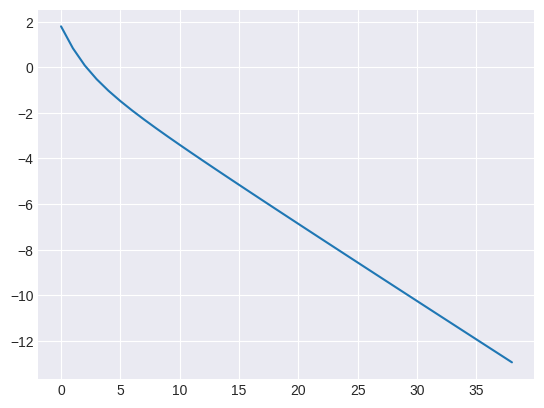

In [ ]:
theta = train(xtrain, ytrain, max_iter=100, learning_rate=0.5)

In [ ]:
theta

array([[ 32.28366851],
       [-23.50043363],
       [-10.3538019 ]])

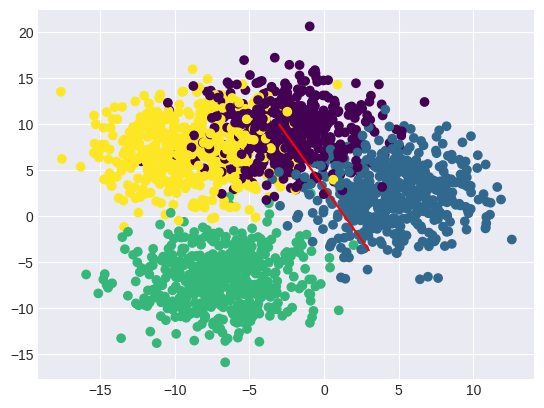

In [ ]:
plt.scatter(x[:,0], x[:,1], c=y, cmap='viridis')

x1 = np.linspace(-3,3,6)
x2 = -(theta[0] + theta[1]*x1)/theta[2]
plt.plot(x1,x2, color='red')
plt.show()

In [ ]:
#Predictions

hypothesis(xtest, theta)

array([[1.49767562e-04],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99999998e-01],
       [9.99935714e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99855418e-01],
       [5.45795529e-07],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [7.21206568e-04],
       [1.00000000e+00],
       [7.05548524e-09],
       [9.99999882e-01],
       [5.72694182e-10],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [6.44585273e-03],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.75031765e-07],
       [1.00000000e+00],
       [7.76056056e-09],
       [1.00000000e+00],
       [9.99999979e-01],
       [1.00000000e+00],
       [1.01162369e-03],
       [4.80582810e-05],
